# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data-images/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

a15ee68b3c017d3556be92ed335fe8d7


## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [30]:
cities

['butaritari',
 'atuona',
 'ushuaia',
 'mahebourg',
 'thompson',
 'cidreira',
 'cape town',
 'albany',
 'klaksvik',
 'khonuu',
 'mataura',
 'lompoc',
 'punta arenas',
 'vila franca do campo',
 'pitimbu',
 'ostersund',
 'axim',
 'bluff',
 'taolanaro',
 'marsh harbour',
 'jamestown',
 'omsukchan',
 'herat',
 'manta',
 'kushmurun',
 'port lincoln',
 'chokurdakh',
 'arraial do cabo',
 'kapaa',
 'dikson',
 'waterloo',
 'kaitangata',
 'esperance',
 'souillac',
 'udachnyy',
 'antofagasta',
 'busselton',
 'pipar',
 'lavrentiya',
 'dandong',
 'peniche',
 'mwinilunga',
 'louisbourg',
 'makasar',
 'saint george',
 'hilo',
 'kavaratti',
 'jacareacanga',
 'avarua',
 'dali',
 'shimoda',
 'qaanaaq',
 'rikitea',
 'khatanga',
 'plaster rock',
 'hithadhoo',
 'barentsburg',
 'ust-kamchatsk',
 'pisco',
 'arrecife',
 'longyearbyen',
 'tasiilaq',
 'nizhneyansk',
 'carnarvon',
 'kasempa',
 'port alfred',
 'narsaq',
 'falmouth',
 'cochrane',
 'ponta do sol',
 'lashio',
 'yomitan',
 'quatre cocos',
 'dankov',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units=Imperial&q="

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = query_url + city
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()

        latitude = city_weather["coord"]["lat"]
        longitude = city_weather["coord"]["lon"]
        max_temp = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Latitude": latitude, 
                          "Longitude": longitude, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | khonuu
City not found. Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | pitimbu
Processing Record 16 of Set 1 | ostersund
Processing Record 17 of Set 1 | axim
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | marsh harbour
Processing Record 21 of Set 1 | jamestown
Processing Record 22 o

Processing Record 30 of Set 4 | raga
City not found. Skipping...
Processing Record 31 of Set 4 | westport
Processing Record 32 of Set 4 | salekhard
Processing Record 33 of Set 4 | malindi
Processing Record 34 of Set 4 | norden
Processing Record 35 of Set 4 | santa maria
Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | mandera
Processing Record 38 of Set 4 | guanare
Processing Record 39 of Set 4 | nikolskoye
Processing Record 40 of Set 4 | sunset
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | manggar
Processing Record 43 of Set 4 | chute-aux-outardes
Processing Record 44 of Set 4 | tera
Processing Record 45 of Set 4 | labuhan
Processing Record 46 of Set 4 | durham
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | fountain
Processing Record 49 of Set 4 | caravelas
Processing Record 0 of Set 5 | vao
Processing Record 1 of Set 5 | riyadh
Processing Record 2 of Set 5 | castro
Processing Recor

Processing Record 17 of Set 8 | vysotskoye
City not found. Skipping...
Processing Record 18 of Set 8 | toliary
City not found. Skipping...
Processing Record 19 of Set 8 | trairi
Processing Record 20 of Set 8 | rancho mirage
Processing Record 21 of Set 8 | maunabo
Processing Record 22 of Set 8 | eyl
Processing Record 23 of Set 8 | chumikan
Processing Record 24 of Set 8 | saint-raymond
Processing Record 25 of Set 8 | burica
City not found. Skipping...
Processing Record 26 of Set 8 | faya
Processing Record 27 of Set 8 | dawlatabad
Processing Record 28 of Set 8 | isangel
Processing Record 29 of Set 8 | nyaunglebin
Processing Record 30 of Set 8 | takoradi
Processing Record 31 of Set 8 | birin
Processing Record 32 of Set 8 | college
Processing Record 33 of Set 8 | fort smith
Processing Record 34 of Set 8 | omboue
Processing Record 35 of Set 8 | nosy varika
Processing Record 36 of Set 8 | wewak
Processing Record 37 of Set 8 | swan river
Processing Record 38 of Set 8 | nikolsk
Processing Recor

City not found. Skipping...
Processing Record 2 of Set 12 | gardan diwal
City not found. Skipping...
Processing Record 3 of Set 12 | medvezhyegorsk
Processing Record 4 of Set 12 | san cristobal
Processing Record 5 of Set 12 | mopipi
Processing Record 6 of Set 12 | najran
Processing Record 7 of Set 12 | nelson bay
Processing Record 8 of Set 12 | horadiz
Processing Record 9 of Set 12 | catamarca
City not found. Skipping...
Processing Record 10 of Set 12 | soyo
Processing Record 11 of Set 12 | basco
Processing Record 12 of Set 12 | north bend
Processing Record 13 of Set 12 | karaton
Processing Record 14 of Set 12 | pitangui
Processing Record 15 of Set 12 | suriapet
Processing Record 16 of Set 12 | baie-comeau
Processing Record 17 of Set 12 | castelnaudary
Processing Record 18 of Set 12 | sechura
Processing Record 19 of Set 12 | kahului
Processing Record 20 of Set 12 | turtkul
City not found. Skipping...
Processing Record 21 of Set 12 | vestmannaeyjar
Processing Record 22 of Set 12 | hears

In [36]:
city_data

[{'City': 'butaritari',
  'Latitude': 3.07,
  'Longitude': 172.79,
  'Max Temp': 83.28,
  'Humidity': 100,
  'Cloudiness': 88,
  'Wind Speed': 6.71,
  'Country': 'KI',
  'Date': 1548131534},
 {'City': 'atuona',
  'Latitude': -9.8,
  'Longitude': -139.03,
  'Max Temp': 81.75,
  'Humidity': 98,
  'Cloudiness': 68,
  'Wind Speed': 13.87,
  'Country': 'PF',
  'Date': 1548131534},
 {'City': 'ushuaia',
  'Latitude': -54.81,
  'Longitude': -68.31,
  'Max Temp': 46.4,
  'Humidity': 75,
  'Cloudiness': 40,
  'Wind Speed': 8.05,
  'Country': 'AR',
  'Date': 1548129600},
 {'City': 'mahebourg',
  'Latitude': -20.41,
  'Longitude': 57.7,
  'Max Temp': 84.2,
  'Humidity': 70,
  'Cloudiness': 75,
  'Wind Speed': 3.36,
  'Country': 'MU',
  'Date': 1548129600},
 {'City': 'thompson',
  'Latitude': 55.74,
  'Longitude': -97.86,
  'Max Temp': -2.21,
  'Humidity': 77,
  'Cloudiness': 90,
  'Wind Speed': 5.82,
  'Country': 'CA',
  'Date': 1548129600},
 {'City': 'cidreira',
  'Latitude': -30.17,
  'Longitude

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
weatherdata_pd = pd.DataFrame(city_data)

weatherdata_pd.to_csv(output_data_file, index=True)

weatherdata_pd.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Latitude      540
Longitude     540
Max Temp      540
Wind Speed    540
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [38]:
weatherdata_pd.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,butaritari,88,KI,1548131534,100,3.07,172.79,83.28,6.71
1,atuona,68,PF,1548131534,98,-9.80,-139.03,81.75,13.87
2,ushuaia,40,AR,1548129600,75,-54.81,-68.31,46.40,8.05
3,mahebourg,75,MU,1548129600,70,-20.41,57.70,84.20,3.36
4,thompson,90,CA,1548129600,77,55.74,-97.86,-2.21,5.82


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

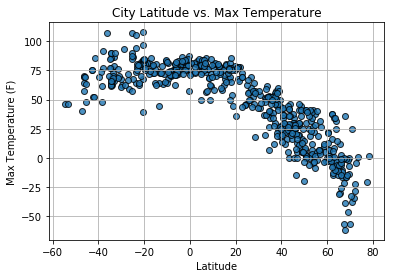

In [42]:
plt.scatter(weatherdata_pd["Latitude"], weatherdata_pd["Max Temp"],edgecolor="black", 
            linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("data-images/maxtemp.png")
plt.show()

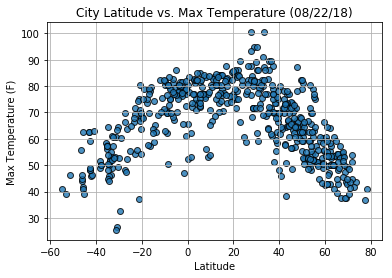

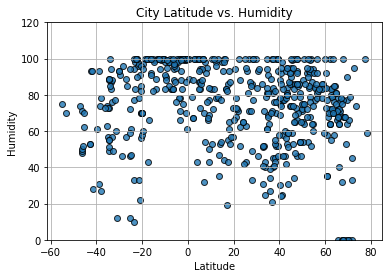

In [50]:
plt.scatter(weatherdata_pd["Latitude"], weatherdata_pd["Humidity"], edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0,120)
plt.savefig("data-images/humidity.png")
plt.show()

#### Latitude vs. Humidity Plot

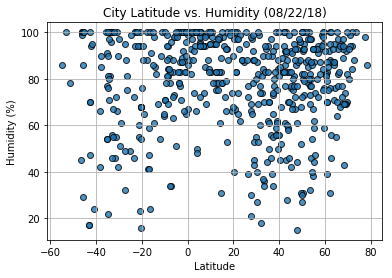

#### Latitude vs. Cloudiness Plot

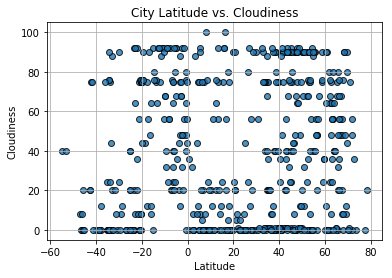

In [52]:
plt.scatter(weatherdata_pd["Latitude"], weatherdata_pd["Cloudiness"], edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("data-images/cloudiness.png")
plt.show()

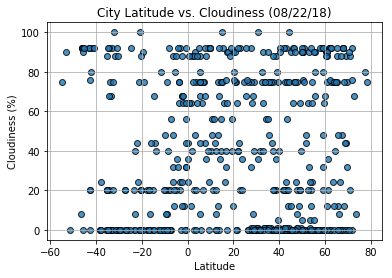

#### Latitude vs. Wind Speed Plot

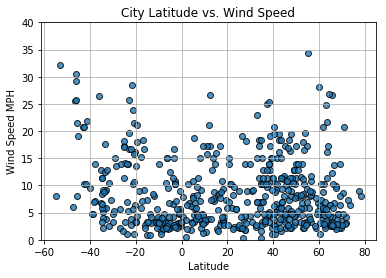

In [57]:
plt.scatter(weatherdata_pd["Latitude"], weatherdata_pd["Wind Speed"], edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed MPH")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0,40)
plt.savefig("data-images/windspeed.png")
plt.show()

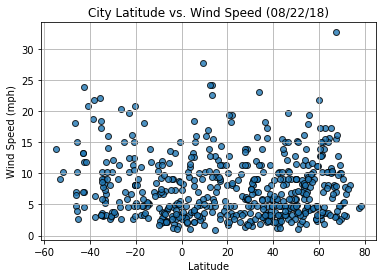